## STEP 1 : Download Dataset and Prepare Programming

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

## STEP 2 : Select Methods

Clustering : Kmeans <br>
Classification : Random Forest

## STEP 3 : Import Dataset and Analysis Dataset

In [2]:
od=pd.read_csv('./data/data.csv', sep=',')
print(od.shape)
print(od.info())

(569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

In [3]:
#first column is contains ill id 
#last column contain only nan value due to extra delimeter end of line
od = od.drop(od.columns[[0,32]],axis=1)

# M(malignant) = 0 and B(benign) = 1 enumeration for more accurty results 
od['diagnosis'] = od['diagnosis'].map({'M':0,'B':1})

# There is main 3 type info here, mean, standard error, and worst/largest mean values. I chose first one
od = od.drop(od.columns[[i for i in range(11,31)]],axis=1)
print(od.shape)
print(od.info())

data_features = od.columns[1:]

(569, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 49.0 KB
None


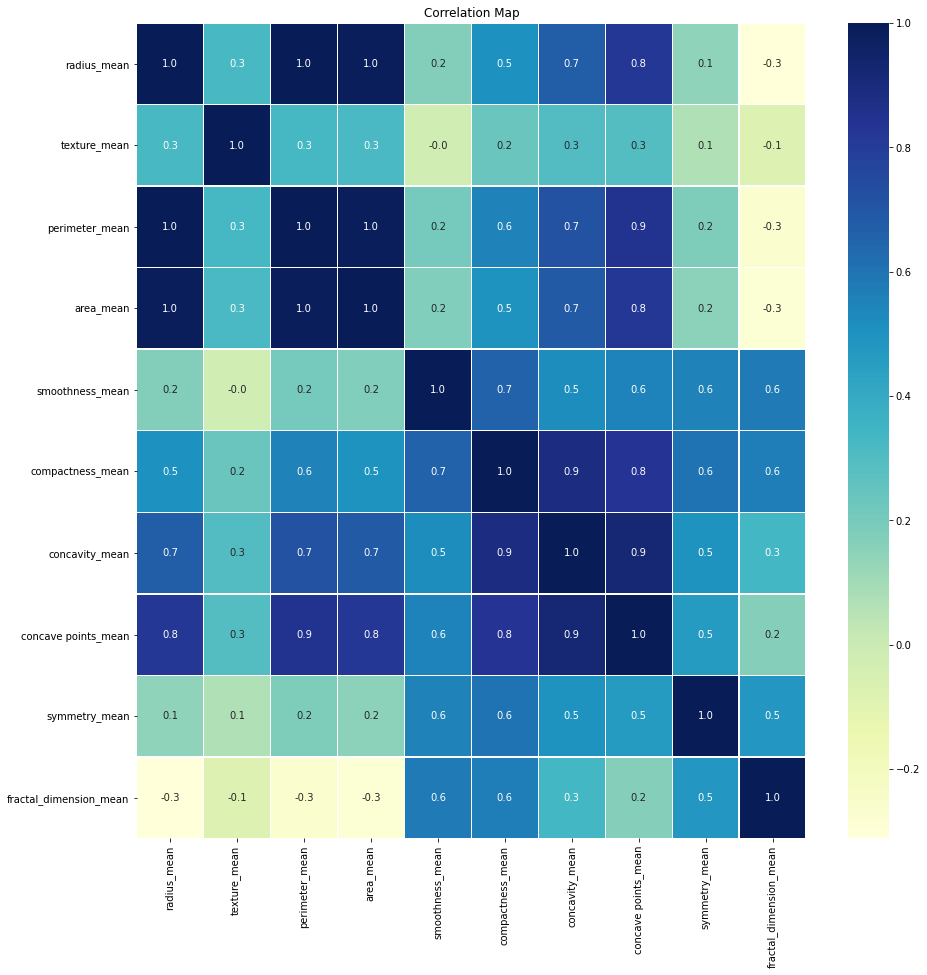

In [4]:
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(od[data_features].corr(),annot= True,linewidths=0.5,fmt = ".1f", ax=ax, cmap="YlGnBu")
plt.title('Correlation Map')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
# plt.savefig('correlationMap_OD.png')
plt.show()

In [25]:
selected_features = ["radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean","concave points_mean"]
# selected_features = ["texture_mean","smoothness_mean","symmetry_mean","fractal_dimension_mean"]

## STEP 4 : Normalize the Dataset

In [6]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns[2:]:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [7]:
nd = normalize(od)
print(nd[:5])

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          0        17.99      0.022658        0.545989   0.363733   
1          0        20.57      0.272574        0.615783   0.501591   
2          0        19.69      0.390260        0.595743   0.449417   
3          0        11.42      0.360839        0.233501   0.102906   
4          0        20.29      0.156578        0.630986   0.489290   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.289880          0.181768        0.203608             0.348757   
2         0.514309          0.431017        0.462512             0.635686   
3         0.811321          0.811361        0.565604             0.522863   
4         0.430351          0.347893        0.463918             0.518390   

   symmetry_mean  fractal_dimension_mean  
0       0.686364                0.605518  
1       0.379798              

## STEP 5 : Cluster the Original Dataset

Text(0.5, 1.0, 'Original - KMeans clustering plot')

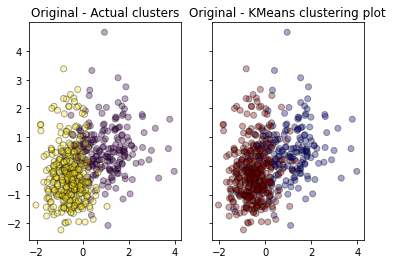

In [8]:
# Featureset creation
X = od.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
km_pred = km.fit_predict(X)

# Scatter plots  https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=od["diagnosis"], edgecolor="black", alpha=0.35)
ax1.set_title("Original - Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="black", alpha=0.35)
ax2.set_title("Original - KMeans clustering plot")

## STEP 6 : Cluster the Normalized Dataset

Text(0.5, 1.0, 'Normalized - KMeans clustering plot')

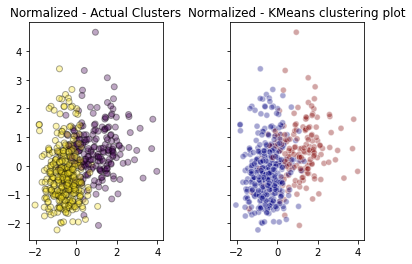

In [55]:
# Featureset creation
X = nd.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
km_pred = km.fit_predict(X)

# Scatter plots  https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.subplots_adjust(wspace=0.5)

ax1.scatter(X[:,0], X[:,1], c=nd["diagnosis"], edgecolor="black", alpha=0.35)
ax1.set_title("Normalized - Actual Clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="white", alpha=0.35)
ax2.set_title("Normalized - KMeans clustering plot")

## STEP 7 : Present Clustered Dataset

## STEP 8 : Split the Normalized and Original Dataset

In [30]:
# Original Dataset
msk = np.random.rand(len(od)) < 0.8
train_od = od[msk]
test_od = od[~msk]
print("Original train shape:",train_od.shape)
print("Original test shape:",test_od.shape)

Original train shape: (458, 11)
Original test shape: (111, 11)


In [31]:
# Normalized Dataset
#msk = np.random.rand(len(nd)) < 0.8
train_nd = nd[msk]
test_nd = nd[~msk]
print("Normalized train shape:",train_nd.shape)
print("Normalized test shape:",test_nd.shape)

Normalized train shape: (458, 11)
Normalized test shape: (111, 11)


## STEP 9.1 : Classify the Original Dataset

In [40]:
# feature selection 97.959 -->> 93.877
# mean,se,worst, all ofthem acc -> 90.361
train_X = train_od[od.columns[1:]]# taking the training data input 
train_y = train_od.diagnosis# This is output of our training data
# same we have to do for test
test_X = test_od[od.columns[1:]] # taking test data inputs
test_y = test_od.diagnosis   #output value of test dat

In [41]:
model = RandomForestClassifier(n_estimators=100)

In [42]:
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.963963963963964

## STEP 9.2 : Classify the Normalized Dataset

In [44]:
# feature selection 97.959 -->> 93.877
# mean,se,worst, all ofthem acc -> 90.361
train_X = train_nd[nd.columns[1:]]# taking the training data input 
train_y = train_nd.diagnosis# This is output of our training data
# same we have to do for test
test_X = test_nd[nd.columns[1:]] # taking test data inputs
test_y = test_nd.diagnosis   #output value of test dat

In [45]:
model = RandomForestClassifier(n_estimators=100)

In [46]:
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.963963963963964

## STEP 10 : Use Scatter Plots to show Relations between  features cluster/classes

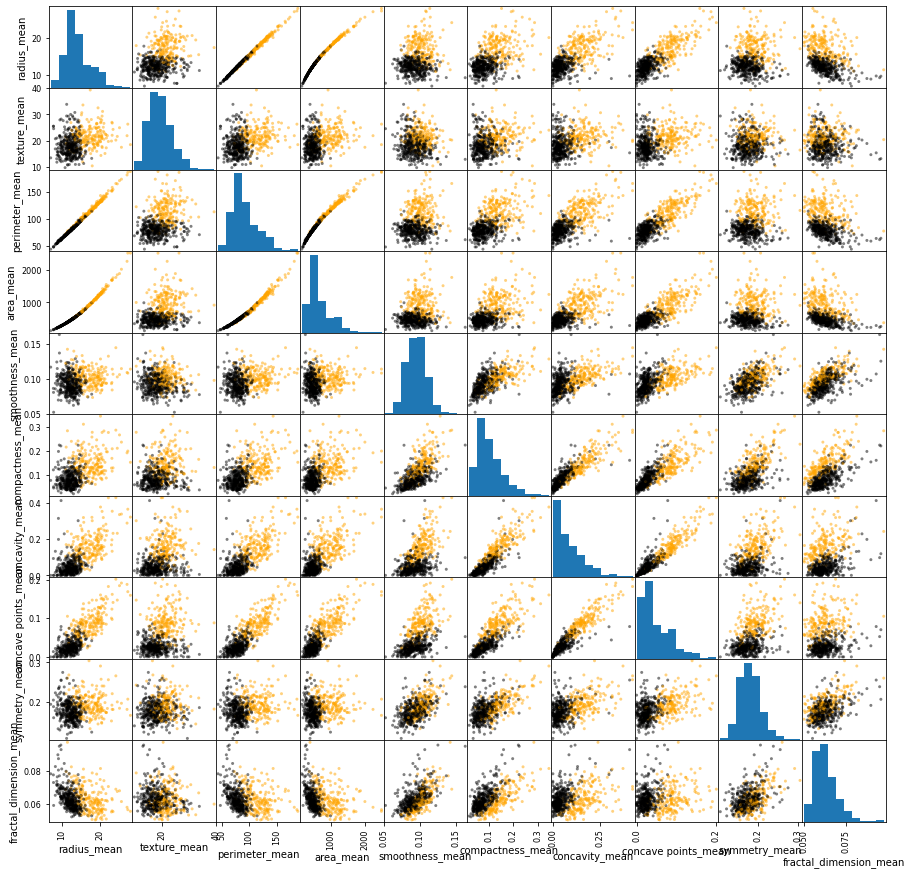

In [70]:
color_function = {0: "orange", 1: "black"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = od["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(od[od.columns[1:]], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

## STEP 11 : Present the Classification Results for each Normalized and Original Dataset

[[0.16906312 0.1954972  0.20195669]
 [0.07967745 0.04814017 0.17323762]]


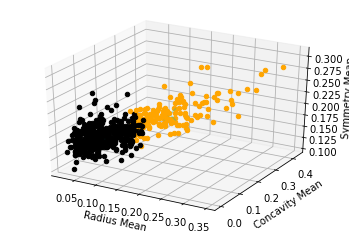

In [66]:
feat_cols = ["radius_mean", "texture_mean", "texture_mean", "area_mean", \
                      "smoothness_mean", "compactness_mean", "concavity_mean", \
                      "symmetry_mean", "fractal_dimension_mean"]

# Actual features used, based on previous knowledge of skin cancer diagnosis factors
feat_cols_sm = ["compactness_mean", "concavity_mean", "symmetry_mean"]
# Use Pandas dataframe query to populate Numpy array with feature vectors.
features = np.array(od[feat_cols_sm])
clusters = KMeans(n_clusters=2, max_iter=300)
clusters.fit(features)
centroids = clusters.cluster_centers_
labels = clusters.labels_
print(centroids)
# Create new MatPlotLib figure
fig = plt.figure()
# Add 3rd dimension to figure
ax = fig.add_subplot(111, projection='3d')
# This means "red" and "blue"
colors = ["orange", "black"]
for i in range(len(features)):
    ax.scatter(xs=features[i][0], ys=features[i][1], zs=features[i][2],
               c=colors[labels[i]], zdir='z')
ax.scatter(xs=centroids[:,0], ys=centroids[:,1], zs=centroids[:,2],
           marker="x", s=150, c="c")

#Set labels on figure and show 3D scatter plot to visualize data and clusters.
ax.set_xlabel("Radius Mean")
ax.set_ylabel("Concavity Mean")
ax.set_zlabel("Symmetry Mean")
plt.show()
